In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3 as db

pd.pandas.set_option('display.max_columns',None)

In [2]:
# https://towardsdatascience.com/an-easy-beginners-guide-to-sqlite-in-python-and-pandas-fbf1f38f6800
# so the line of code above will connect to a file called my_database.db IF IT EXISTS in the folder. If it does not exist, a file called my_database.db will automatically be created on your computer 

conn = db.connect('../data/news_popularity.db')

# In order to interact with our database, we now have to create a cursor. This is what we will use to issue commands that will allow us to query or modify our database.
# c = conn.cursor()
# good practise to close if not using
# c.close()
# conn.close()

In [3]:
# simplest way
# df = pd.read_sql_query('select * from sqlite_master', conn)
# df

cursor = conn.cursor()
cursor.execute("SELECT name from sqlite_master WHERE type='table';")

print(cursor.fetchall())
cursor.close()

[('articles',), ('description',), ('keywords',)]


In [4]:
df_articles = pd.read_sql_query('select * from articles',conn)
df_description = pd.read_sql_query('select * from description', conn)
df_keywords = pd.read_sql_query('select * from keywords',conn)

In [5]:
print(df_articles.shape)
df_articles.head()

(39644, 5)


,ID,url,timedelta,weekday,shares
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505


In [6]:
print(df_description.shape)
df_description.head()

(39644, 16)


,ID,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares
0,0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000
1,1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000
2,2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000
3,3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000
4,4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895


In [7]:
print(df_keywords.shape)
df_keywords.head()

(35680, 11)


,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### so it looks like they have common ID, and we can assume we can join them together for more context, but keywords seem to have lesser row for some reason?

In [8]:
df_keywords.tail()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg
35675,39638,6.0,-1.0,459.0,91.000,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159
35676,39639,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764
35677,39640,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830
35678,39642,5.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883
35679,39643,4.0,-1.0,97.0,23.500,205600.0,843300.0,366200.000000,3035.080555,3613.512953,3296.909481


In [9]:
df_keywords['ID'].count()

35680

In [10]:
df_articles.tail()

,ID,url,timedelta,weekday,shares
39639,39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,wednesday,1800
39640,39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,wednesday,1900
39641,39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,wednesday,1900
39642,39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,wednesday,1100
39643,39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,wednesday,1300


In [11]:
df_articles['ID'].count()

39644

In [12]:
df_description.tail()

,ID,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares
39639,39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,NaN,72.0,4.523121,technology,11400.0,48000.0,37033.333333
39640,39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,76.0,4.405488,social_media,2100.0,2100.0,2100.000000
39641,39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,0.0,5.076923,None,1400.0,1400.0,1400.000000
39642,39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,0.0,4.975073,world,452.0,452.0,452.000000
39643,39643,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,NaN,130.0,4.471338,entertainment,2100.0,2100.0,2100.000000


In [13]:
df_description['ID'].isnull().count()

39644

In [14]:
df_articles['ID'].is_unique

True

In [15]:
df_description['ID'].is_unique

True

In [16]:
df_keywords['ID'].is_unique

True

### data here will suggest that keywords have lesser and as such, the other columns have to be dropped.
this  is cause


1) we can generate mean or median or random values, except that will not be possible for url, therefore i feel it is best to drop the extra rows.

2) url is unique and not duplicated

3) ID is also unique

In [17]:
rowdiff = 39644 - 35680
print('difference in row = ', rowdiff)

difference in row =  3964


### SQL joins
https://www.analyticsvidhya.com/blog/2021/06/join-the-dataframes-like-sql-tables-in-python-using-pandas/


(INNER) JOIN: Returns only those records that have matching values in both DataFrames

LEFT (OUTER) JOIN: Returns all the records from the left DataFrame and the matched records from the right DataFrame

RIGHT (OUTER) JOIN: Returns all the records from the right DataFrame, and the matched records from the left DataFrame

FULL (OUTER) JOIN: Returns all the records when there is a match in either left or right DataFrame


https://www.analyticsvidhya.com/blog/2021/06/15-pandas-functions-to-replicate-basic-sql-queries-in-python/

In [18]:
# https://pandas.pydata.org/docs/user_guide/merging.html

# Something to note is that whilst the default for merge() is "inner", the default for join() is left. 
# So if you are working with index joins be mindful. 

df_premerge = pd.merge(df_keywords, df_description,  on="ID",how="outer")
df_merged = pd.merge(df_premerge, df_articles, on="ID",how="outer")

In [19]:
df_merged.head()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593
1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711
2,2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500
3,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200
4,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505


In [20]:
df_merged.shape

(39644, 30)

In [21]:
df_merged.describe()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,timedelta,shares
count,39644.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,38851.000000,38851.000000,38058.000000,21011.000000,39644.000000,39644.000000,38851.000000,38851.000000,38851.000000,39644.000000,39644.000000
mean,19821.500000,7.220095,26.169703,1142.296851,310.297441,13533.498851,752318.562220,259143.787814,1115.670961,5637.977838,3130.799667,10.398749,546.514731,0.548216,0.996469,0.689175,10.891792,3.294458,4.538336,1.284565,94.971168,4.548239,4007.686775,10357.140660,6417.144920,354.530471,3395.380184
std,11444.381373,1.909604,69.705812,3844.829034,616.961660,57623.779316,214391.922961,135080.424060,1136.741358,6026.965362,1311.012948,2.114037,471.107508,3.520708,5.231231,3.264816,11.374574,3.864212,8.285066,4.144714,472.550267,0.844406,19876.663280,41340.581032,24390.372003,214.163767,11626.950749
min,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
25%,9910.750000,6.000000,-1.000000,445.000000,141.440476,0.000000,843300.000000,172595.650000,0.000000,3559.646658,2379.762290,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,2.000000,4.478404,638.000000,1100.000000,980.000000,164.000000,946.000000
50%,19821.500000,7.000000,-1.000000,658.000000,235.428571,1400.000000,843300.000000,244133.333333,1020.667532,4348.584651,2867.991456,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,16.000000,4.664082,1200.000000,2800.000000,2200.000000,339.000000,1400.000000
75%,29732.250000,9.000000,4.000000,1000.000000,357.000000,7800.000000,843300.000000,330980.000000,2058.093423,6015.434738,3595.530145,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,78.000000,4.854839,2600.000000,8000.000000,5200.000000,542.000000,2800.000000
max,39643.000000,10.000000,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3610.124972,298400.000000,43567.659946,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,61790.000000,8.041534,843300.000000,843300.000000,843300.000000,731.000000,843300.000000


In [22]:
df_merged.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                  object
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

### findings
nice to see most of them are numerical, lesser work and conversion to do..

In [23]:
df_merged.isnull().sum()

ID                               0
num_keywords                  3964
kw_min_min                    3964
kw_max_min                    3964
kw_avg_min                    3964
kw_min_max                    3964
kw_max_max                    3964
kw_avg_max                    3964
kw_min_avg                    3964
kw_max_avg                    3964
kw_avg_avg                    3964
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                      793
num_self_hrefs                 793
num_imgs                      1586
num_videos                   18633
n_comments                       0
average_token_length             0
data_channel                  6134
self_reference_min_shares      793
self_reference_max_shares      793
self_reference_avg_shares      793
url                              0
timedelta                        0
weekday             

so there are some null values to handle..

In [24]:
df_merged.tail()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
39639,39591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,247.0,0.589212,1.0,0.709459,4.0,4.0,2.0,0.0,4.0,4.631579,world,839.0,2800.0,1746.333333,http://mashable.com/2014/12/26/de-blasio-ramos...,9.0,tuesday,1100
39640,39597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1016.0,0.419067,1.0,0.571429,7.0,5.0,3.0,1.0,168.0,4.791339,technology,1400.0,3300.0,2125.000000,http://mashable.com/2014/12/26/hilarious-news-...,9.0,tuesday,2100
39641,39623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,436.0,0.529412,1.0,0.701681,6.0,6.0,NaN,NaN,95.0,4.146789,technology,878.0,4200.0,1776.600000,http://mashable.com/2014/12/26/what-is-tor/,9.0,tuesday,947
39642,39628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,626.0,0.552504,1.0,0.759791,4.0,2.0,NaN,0.0,40.0,5.078275,world,921.0,5800.0,3360.500000,http://mashable.com/2014/12/27/facebook-year-i...,9.0,tuesday,1000
39643,39641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,0.0,5.076923,None,1400.0,1400.0,1400.000000,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,wednesday,1900


In [25]:
df_merged

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
0,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000,http://mashable.com/2013/01/07/amazon-instant-...,731.0,monday,593
1,1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,monday,711
2,2,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000,http://mashable.com/2013/01/07/apple-40-billio...,731.0,monday,1500
3,3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000,http://mashable.com/2013/01/07/astronaut-notre...,731.0,monday,1200
4,4,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,monday,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,39591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,247.0,0.589212,1.0,0.709459,4.0,4.0,2.0,0.0,4.0,4.631579,world,839.0,2800.0,1746.333333,http://mashable.com/2014/12/26/de-blasio-ramos...,9.0,tuesday,1100
39640,39597,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,1016.0,0.419067,1.0,0.571429,7.0,5.0,3.0,1.0,168.0,4.791339,technology,1400.0,3300.0,2125.000000,http://mashable.com/2014/12/26/hilarious-news-...,9.0,tuesday,2100
39641,39623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,436.0,0.529412,1.0,0.701681,6.0,6.0,NaN,NaN,95.0,4.146789,technology,878.0,4200.0,1776.600000,http://mashable.com/2014/12/26/what-is-tor/,9.0,tuesday,947
39642,39628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,626.0,0.552504,1.0,0.759791,4.0,2.0,NaN,0.0,40.0,5.078275,world,921.0,5800.0,3360.500000,http://mashable.com/2014/12/27/facebook-year-i...,9.0,tuesday,1000


### added copy below other wise it only refer instead of copy entirely

In [26]:
df_merge_clean = df_merged.dropna(subset=['num_keywords','kw_min_min','kw_max_min','kw_avg_min']).copy()

In [27]:
df_merge_clean.shape

(35680, 30)

In [28]:
df_merge_clean.describe()

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,timedelta,shares
count,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,35680.000000,34959.000000,34959.000000,34261.000000,18925.000000,35680.000000,35680.000000,34959.000000,34959.000000,34959.000000,35680.000000,35680.000000
mean,19823.468918,7.220095,26.169703,1142.296851,310.297441,13533.498851,752318.562220,259143.787814,1115.670961,5637.977838,3130.799667,10.395432,545.995123,0.530461,0.970263,0.672738,10.866358,3.282531,4.513003,1.286446,94.122001,4.547799,4026.946198,10308.613255,6424.933389,354.523234,3402.054961
std,11452.292291,1.909604,69.705812,3844.829034,616.961660,57623.779316,214391.922961,135080.424060,1136.741358,6026.965362,1311.012948,2.114600,469.550052,0.136935,0.169862,0.153881,11.260971,3.834065,8.259735,4.148189,476.050347,0.843522,20110.819102,40998.053595,24588.092091,214.301086,11934.878541
min,0.000000,1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,4.000000
25%,9890.750000,6.000000,-1.000000,445.000000,141.440476,0.000000,843300.000000,172595.650000,0.000000,3559.646658,2379.762290,9.000000,247.000000,0.471030,1.000000,0.625912,4.000000,1.000000,1.000000,0.000000,2.000000,4.477958,638.000000,1100.000000,978.000000,163.000000,946.000000
50%,19801.500000,7.000000,-1.000000,658.000000,235.428571,1400.000000,843300.000000,244133.333333,1020.667532,4348.584651,2867.991456,10.000000,410.000000,0.539011,1.000000,0.690323,8.000000,3.000000,1.000000,0.000000,16.000000,4.663366,1200.000000,2800.000000,2200.000000,339.000000,1400.000000
75%,29788.250000,9.000000,4.000000,1000.000000,357.000000,7800.000000,843300.000000,330980.000000,2058.093423,6015.434738,3595.530145,12.000000,716.000000,0.608203,1.000000,0.754036,14.000000,4.000000,4.000000,1.000000,78.000000,4.853695,2600.000000,7900.000000,5166.666667,543.000000,2800.000000
max,39643.000000,10.000000,377.000000,298400.000000,42827.857143,843300.000000,843300.000000,843300.000000,3610.124972,298400.000000,43567.659946,23.000000,8474.000000,1.000000,1.000000,1.000000,304.000000,116.000000,128.000000,91.000000,61790.000000,8.041534,843300.000000,843300.000000,843300.000000,731.000000,843300.000000


In [29]:
df_merge_clean.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                  object
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

In [30]:
#display unique values for variable
df_merge_clean['data_channel'].unique()

array(['entertainment', 'business', 'technology', 'lifestyle', 'world',
       None, 'social_media'], dtype=object)

In [31]:
df_merge_clean['data_channel'].nunique()

6

In [32]:
df_merge_clean['data_channel'].isnull().sum()

5462

In [33]:
df_merge_clean['data_channel'].value_counts()

world            7573
technology       6642
entertainment    6407
business         5623
social_media     2089
lifestyle        1884
Name: data_channel, dtype: int64

In [34]:
howmany = df_merge_clean['data_channel'].value_counts().sum()
print(howmany)
df_merge_clean.shape

30218


(35680, 30)

### interest here, world has most, lifestyle has least

In [35]:
df_merge_clean['url'].unique()

array(['http://mashable.com/2013/01/07/amazon-instant-video-browser/',
       'http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/',
       'http://mashable.com/2013/01/07/apple-40-billion-app-downloads/',
       ...,
       'http://mashable.com/2014/12/27/seth-rogen-james-franco-will-live-tweet-the-interview/',
       'http://mashable.com/2014/12/27/ukraine-blasts/',
       'http://mashable.com/2014/12/27/youtube-channels-2015/'],
      dtype=object)

In [36]:
df_merge_clean['weekday'].unique()

array(['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday',
       'sunday'], dtype=object)

we can see everyday of the week here

In [37]:
# get the count of unique...
df_merge_clean['weekday'].value_counts()

wednesday    6663
tuesday      6646
thursday     6563
monday       5977
friday       5147
sunday       2472
saturday     2212
Name: weekday, dtype: int64

### (just checking) saturday and sunday has way lesser..

In [38]:
df_merge_clean.loc[df_merge_clean['weekday'] == 'saturday']

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
274,311,5.0,217.0,1100.0,525.500000,0.0,37400.0,11900.000000,0.000000,2414.012903,1480.001265,7.0,203.0,0.668367,1.0,0.826772,4.0,0.0,1.0,0.0,6.0,4.980296,world,0.0,0.0,0.0,http://mashable.com/2013/01/12/aaron-swartz-su...,726.0,saturday,5300
275,312,6.0,217.0,1300.0,507.800000,0.0,37400.0,13166.666667,0.000000,2414.012903,1603.704504,11.0,351.0,0.521490,1.0,0.658654,9.0,6.0,1.0,0.0,64.0,4.626781,technology,1600.0,1800.0,1700.0,http://mashable.com/2013/01/12/apple-consideri...,726.0,saturday,1600
276,313,9.0,217.0,823.0,483.428571,0.0,37400.0,10624.777778,0.000000,3579.418605,1758.927575,11.0,566.0,0.553114,1.0,0.734513,18.0,2.0,11.0,NaN,13.0,4.360424,None,3700.0,3700.0,3700.0,http://mashable.com/2013/01/12/bacon-shaving-c...,726.0,saturday,6300
277,314,7.0,217.0,835.0,335.428571,1100.0,37400.0,17714.285714,1011.666667,2414.012903,1731.099610,13.0,297.0,0.532203,1.0,0.583732,1.0,1.0,21.0,NaN,0.0,4.902357,technology,1000.0,1000.0,1000.0,http://mashable.com/2013/01/12/bling-tech/,726.0,saturday,2000
278,315,10.0,217.0,1100.0,568.571429,0.0,37400.0,12750.000000,0.000000,7054.090909,2342.055575,8.0,104.0,0.754902,1.0,0.862069,4.0,2.0,1.0,NaN,46.0,4.644231,None,0.0,0.0,0.0,http://mashable.com/2013/01/12/create-winning-...,726.0,saturday,2300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35537,39487,10.0,-1.0,237.0,84.100000,15000.0,843300.0,306870.000000,2169.818359,4980.538462,3251.785769,11.0,303.0,0.601351,1.0,0.776536,6.0,4.0,2.0,1.0,138.0,4.792079,technology,10200.0,10200.0,10200.0,http://mashable.com/2014/12/23/ukraine-non-ali...,12.0,saturday,2300
35538,39488,7.0,-1.0,666.0,186.571429,11400.0,843300.0,323442.857143,2599.153846,4294.127632,3418.972120,12.0,181.0,0.628571,1.0,0.699187,10.0,1.0,1.0,NaN,120.0,4.845304,entertainment,7000.0,7000.0,7000.0,http://mashable.com/2014/12/23/where-the-inter...,12.0,saturday,1500
35539,39489,7.0,-1.0,971.0,234.227143,36900.0,843300.0,531585.714286,3385.379027,7777.027273,6071.632161,12.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,17.0,0.000000,None,0.0,0.0,0.0,http://mashable.com/2014/12/24/1-5-million-chr...,12.0,saturday,8600
35540,39490,6.0,-1.0,929.0,154.000000,6000.0,843300.0,292166.666667,1622.007916,3385.379027,2570.485825,10.0,914.0,0.498343,1.0,0.671930,12.0,1.0,2.0,2.0,22.0,5.114880,world,1100.0,1100.0,1100.0,http://mashable.com/2014/12/24/1968-daddys-gon...,12.0,saturday,2200


### so looks like under data channel, there is also None that was missed earlier.. and why kw_min_min can be negative..

In [39]:
df_merge_clean['data_channel'].isnull().sum()

5462

In [40]:
df_merge_clean.loc[df_merge_clean['data_channel'] == 'none']

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares


## SEE THE WHOLE ROW OF A PARTICULAR COLUMN (syntax below)

In [41]:
# check all none for the data_channel column
datachannelNone = df_merge_clean[df_merge_clean['data_channel'].isnull()]
print('shape = ',datachannelNone.shape)
datachannelNone

shape =  (5462, 30)


,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
11,12,8.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.0,274.0,0.609195,1.0,0.707602,18.0,2.0,11.0,0.0,0.0,4.233577,None,10700.0,16200.0,13450.000000,http://mashable.com/2013/01/07/creature-cups/,731.0,monday,823
12,13,6.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.0,285.0,0.744186,1.0,0.841530,4.0,2.0,0.0,NaN,200.0,4.343860,None,770.0,22800.0,11785.000000,http://mashable.com/2013/01/07/dad-jokes/,731.0,monday,10000
13,14,7.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.0,259.0,0.562753,1.0,0.644444,19.0,3.0,9.0,NaN,15.0,5.023166,None,4800.0,4800.0,4800.000000,http://mashable.com/2013/01/07/downton-abbey-t...,731.0,monday,761
15,16,5.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.0,1118.0,0.512397,1.0,0.709770,26.0,18.0,12.0,1.0,1088.0,4.703936,None,555.0,14000.0,3904.625000,http://mashable.com/2013/01/07/echo-game/,731.0,monday,13600
32,33,6.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.0,597.0,0.531732,1.0,0.704110,5.0,0.0,1.0,0.0,11.0,4.343384,None,0.0,0.0,0.000000,http://mashable.com/2013/01/07/lionel-messi-fa...,731.0,monday,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35640,39601,7.0,-1.0,426.0,126.227143,211600.0,843300.0,586742.857143,3385.393320,7519.376771,6133.006554,12.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,8.0,0.000000,None,0.0,0.0,0.000000,http://mashable.com/2014/12/26/minority-author...,9.0,tuesday,2300
35646,39607,9.0,-1.0,981.0,222.375000,0.0,843300.0,303586.777778,0.000000,7614.721649,4159.396557,9.0,376.0,0.545190,1.0,0.631818,18.0,3.0,1.0,NaN,4.0,4.595745,None,9700.0,16500.0,13100.000000,http://mashable.com/2014/12/26/putin-cancels-n...,9.0,tuesday,2500
35655,39616,6.0,-1.0,1100.0,261.666667,9100.0,843300.0,433366.666667,2005.754386,5829.174629,3835.453639,15.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN,84.0,0.000000,None,0.0,0.0,0.000000,http://mashable.com/2014/12/26/top-photography...,9.0,tuesday,2100
35660,39621,3.0,-1.0,2000.0,666.000000,2000.0,843300.0,562866.666667,2000.000000,5776.030652,3720.474658,9.0,468.0,0.582781,1.0,0.691318,17.0,1.0,NaN,NaN,486.0,4.854701,None,21600.0,21600.0,21600.000000,http://mashable.com/2014/12/26/ukraine-prisone...,9.0,tuesday,24300


#### is there data loss if i remove None from data_channel.. should i remove or rename as 'None', is there value in renaming

ok nvm.. remove none for now since it is quite hard to make sense that none as a data channel giving meaning
# feature engineering

### changing days to numerical

In [42]:
# change day to numerical
daysconverted = {'monday':1 ,"tuesday":2,"wednesday":3,"thursday":4,"friday":5,"saturday":6,"sunday":7}
# df_merge_clean['weekday'] = df_merge_clean['weekday'].apply(lambda x : daysconverted[x])
# df_merge_clean['weekday']
# data.loc[data.bidder == 'parakeet2004', 'bidderrate'] = 100
# df_merge_clean.loc[df_merge_clean['weekday'] == 'monday'] = 1
# df_merge_clean.loc[df_merge_clean['weekday'] == 'tuesday'] = 2
# df_merge_clean.loc[df_merge_clean['weekday'] == 'wednesday'] = 3
# df_merge_clean.loc[df_merge_clean['weekday'] == 'thursday'] = 4
# df_merge_clean.loc[df_merge_clean['weekday'] == 'friday'] = 5
# df_merge_clean.loc[df_merge_clean['weekday'] == 'saturday'] = 6
# df_merge_clean.loc[df_merge_clean['weekday'] == 'sunday'] = 7

# def changedaytonum(df_merge_clean, day):
    

# df_new = df_merge_clean.replace(daysconverted, inplace=True)
# df_merge_clean.loc[df_merge_clean[]]
df_merge_clean.replace(to_replace = ['monday','tuesday','wednesday','thursday','friday','saturday','sunday'], value=[1,2,3,4,5,6,7], inplace=True)

# change data_chan to numerical

df_merge_clean['weekday']


# do correlation .. find relation

0        1
1        1
2        1
3        1
4        1
        ..
35675    3
35676    3
35677    3
35678    3
35679    3
Name: weekday, Length: 35680, dtype: int64

In [43]:
df_merge_clean['data_channel'].isnull().sum()

5462

In [44]:
df_merge_clean.isnull().sum()

ID                               0
num_keywords                     0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                      721
num_self_hrefs                 721
num_imgs                      1419
num_videos                   16755
n_comments                       0
average_token_length             0
data_channel                  5462
self_reference_min_shares      721
self_reference_max_shares      721
self_reference_avg_shares      721
url                              0
timedelta                        0
weekday             

In [45]:
df_merge_clean.dtypes

ID                             int64
num_keywords                 float64
kw_min_min                   float64
kw_max_min                   float64
kw_avg_min                   float64
kw_min_max                   float64
kw_max_max                   float64
kw_avg_max                   float64
kw_min_avg                   float64
kw_max_avg                   float64
kw_avg_avg                   float64
n_tokens_title               float64
n_tokens_content             float64
n_unique_tokens              float64
n_non_stop_words             float64
n_non_stop_unique_tokens     float64
num_hrefs                    float64
num_self_hrefs               float64
num_imgs                     float64
num_videos                   float64
n_comments                   float64
average_token_length         float64
data_channel                  object
self_reference_min_shares    float64
self_reference_max_shares    float64
self_reference_avg_shares    float64
url                           object
t

### check all the null empty one

In [46]:
datachannelNone

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
11,12,8.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.0,274.0,0.609195,1.0,0.707602,18.0,2.0,11.0,0.0,0.0,4.233577,None,10700.0,16200.0,13450.000000,http://mashable.com/2013/01/07/creature-cups/,731.0,monday,823
12,13,6.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.0,285.0,0.744186,1.0,0.841530,4.0,2.0,0.0,NaN,200.0,4.343860,None,770.0,22800.0,11785.000000,http://mashable.com/2013/01/07/dad-jokes/,731.0,monday,10000
13,14,7.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.0,259.0,0.562753,1.0,0.644444,19.0,3.0,9.0,NaN,15.0,5.023166,None,4800.0,4800.0,4800.000000,http://mashable.com/2013/01/07/downton-abbey-t...,731.0,monday,761
15,16,5.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,8.0,1118.0,0.512397,1.0,0.709770,26.0,18.0,12.0,1.0,1088.0,4.703936,None,555.0,14000.0,3904.625000,http://mashable.com/2013/01/07/echo-game/,731.0,monday,13600
32,33,6.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,10.0,597.0,0.531732,1.0,0.704110,5.0,0.0,1.0,0.0,11.0,4.343384,None,0.0,0.0,0.000000,http://mashable.com/2013/01/07/lionel-messi-fa...,731.0,monday,573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35640,39601,7.0,-1.0,426.0,126.227143,211600.0,843300.0,586742.857143,3385.393320,7519.376771,6133.006554,12.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,1.0,8.0,0.000000,None,0.0,0.0,0.000000,http://mashable.com/2014/12/26/minority-author...,9.0,tuesday,2300
35646,39607,9.0,-1.0,981.0,222.375000,0.0,843300.0,303586.777778,0.000000,7614.721649,4159.396557,9.0,376.0,0.545190,1.0,0.631818,18.0,3.0,1.0,NaN,4.0,4.595745,None,9700.0,16500.0,13100.000000,http://mashable.com/2014/12/26/putin-cancels-n...,9.0,tuesday,2500
35655,39616,6.0,-1.0,1100.0,261.666667,9100.0,843300.0,433366.666667,2005.754386,5829.174629,3835.453639,15.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,NaN,84.0,0.000000,None,0.0,0.0,0.000000,http://mashable.com/2014/12/26/top-photography...,9.0,tuesday,2100
35660,39621,3.0,-1.0,2000.0,666.000000,2000.0,843300.0,562866.666667,2000.000000,5776.030652,3720.474658,9.0,468.0,0.582781,1.0,0.691318,17.0,1.0,NaN,NaN,486.0,4.854701,None,21600.0,21600.0,21600.000000,http://mashable.com/2014/12/26/ukraine-prisone...,9.0,tuesday,24300


## remove data channel None

In [59]:
df_merge_clean.dropna(subset=['data_channel'], inplace=True)
df_merge_clean.data_channel.unique()
datachannelNone = df_merge_clean[df_merge_clean['data_channel'].isnull()]
datachannelNone
df_merge_clean.shape
tempviewer = df_merge_clean[df_merge_clean['num_videos'].isnull()]
tempviewer
df_merge_clean

,ID,num_keywords,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,n_comments,average_token_length,data_channel,self_reference_min_shares,self_reference_max_shares,self_reference_avg_shares,url,timedelta,weekday,shares
0,0,5.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,0.0,4.680365,entertainment,496.0,496.0,496.000000,http://mashable.com/2013/01/07/amazon-instant-...,731.0,1,593
1,1,4.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,NaN,28.0,4.913725,business,0.0,0.0,0.000000,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,1,711
2,2,6.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,15.0,4.393365,business,918.0,918.0,918.000000,http://mashable.com/2013/01/07/apple-40-billio...,731.0,1,1500
3,3,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,72.0,4.404896,entertainment,0.0,0.0,0.000000,http://mashable.com/2013/01/07/astronaut-notre...,731.0,1,1200
4,4,7.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,NaN,20.0,4.682836,technology,545.0,16000.0,3151.157895,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,1,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35675,39638,6.0,-1.0,459.0,91.000,0.0,843300.0,484083.333333,0.000000,4301.332394,2665.713159,11.0,223.0,0.653153,1.0,0.825758,5.0,3.0,1.0,0.0,72.0,4.923767,business,2000.0,5700.0,3633.333333,http://mashable.com/2014/12/27/protests-contin...,8.0,3,1200
35676,39639,8.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,NaN,72.0,4.523121,technology,11400.0,48000.0,37033.333333,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,3,1800
35677,39640,7.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,76.0,4.405488,social_media,2100.0,2100.0,2100.000000,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,3,1900
35678,39642,5.0,-1.0,0.0,-1.000,0.0,843300.0,254600.000000,0.000000,3384.316871,1777.895883,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,0.0,4.975073,world,452.0,452.0,452.000000,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,3,1100


check for outliets in the null columns. 

num_hrefs                      721

num_self_hrefs                 721

num_imgs                      1419

num_videos                   16755

self_reference_min_shares      721

self_reference_max_shares      721

self_reference_avg_shares      721

In [60]:
df_merge_clean.isnull().sum()

ID                               0
num_keywords                     0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                      591
num_self_hrefs                 591
num_imgs                      1173
num_videos                   14224
n_comments                       0
average_token_length             0
data_channel                     0
self_reference_min_shares      591
self_reference_max_shares      591
self_reference_avg_shares      591
url                              0
timedelta                        0
weekday             

### there is some null in num_hrefs, checking for outliers

highest val is  304.0


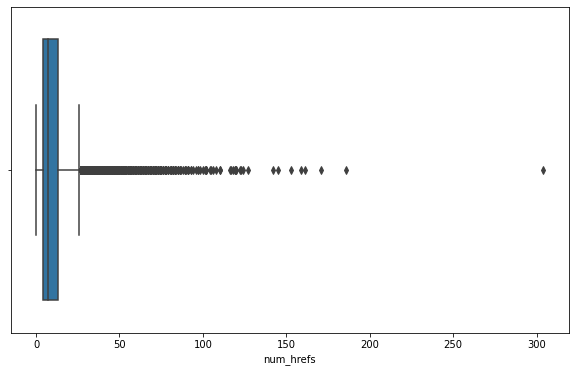

In [161]:
# print(df_merge_clean.dtypes)
# print(df_merge_clean.describe())


# valofcol = df_merge_clean['num_hrefs'].value_counts().values
valofcol = df_merge_clean['num_hrefs'].value_counts().values
print('highest val is ',df_merge_clean['num_hrefs'].max())

fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x=df_merge_clean['num_hrefs'],ax=ax,data=df_merge_clean)
plt.show()

### above shows there is one outlier at 304, most of the other is at 0-50

## paused here, quick visit to the book to understand why and ref EDA

In [164]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x=df_merge_clean['num_hrefs'],y=df_merge_clean['url'])
plt.show()

KeyboardInterrupt: 

<AxesSubplot:>

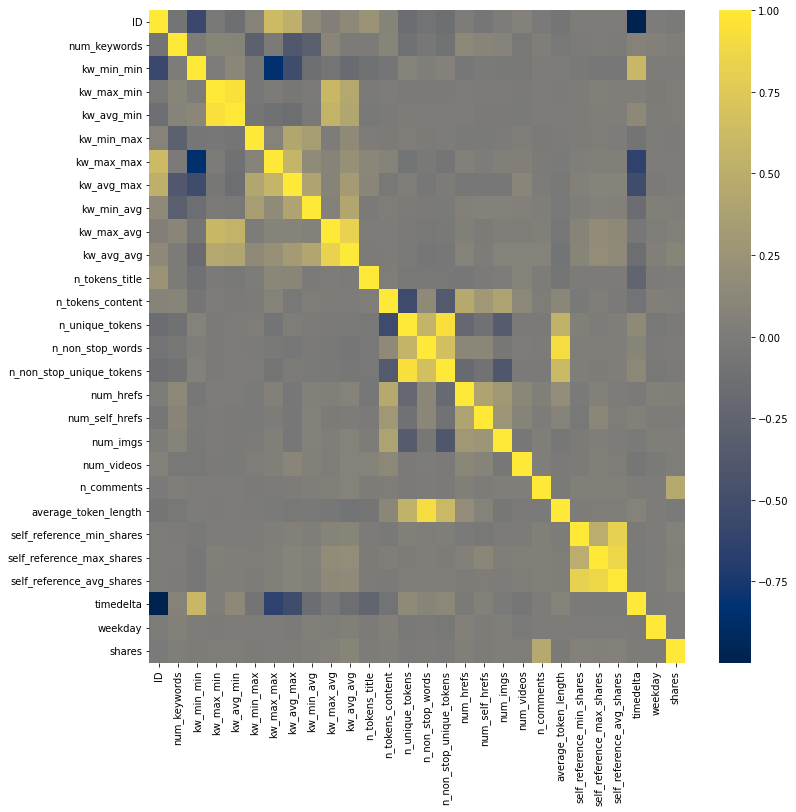

In [83]:
df2 = df_merge_clean.corr()
fig, ax = plt.subplots(figsize=(12,12))
# use cmap cividis for colourblind friendlyness
sns.heatmap(df2,cmap="cividis",ax=ax)